In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels

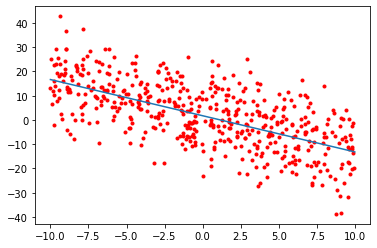

In [2]:
f, points = generate_regression(point_count=500, scale=3, y_scale=10)

visualize_regression_point(f, points)

In [3]:
storage = BenchmarkStorage()

# SGD

[-1.27196845  1.8793695 ]
Benchmark results for config <('sgd', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.060335
Mean memory:352.26kB
Mean SMAPE value:0.5584978786940491
Mean RMSE value:10.2196347849284
Mean logcosh value:3775.3627607784424
Mean gradient calls:300.0
Iterations done:300.0


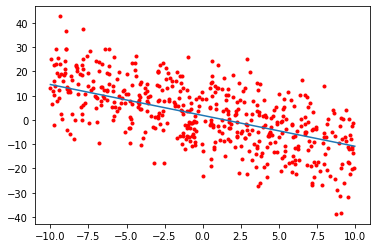

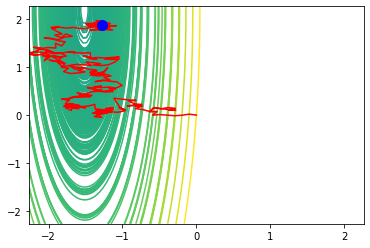

In [4]:
index = storage.add_benchmark_config()
ab, meta = sgd(points)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `1` вызов градта за итерацию
* Точность плохая т.к. один градиент из суммы описывает очень плохо градиент суммы
* Градиент м/у итерациями сильно "прыгает"

# Minibatch GD
batch size = `[10, 50, 100]`

## 10

[-1.26936316  0.14228527]
Benchmark results for config <('mini10', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.008478
Mean memory:0.0B
Mean SMAPE value:0.5597042365517929
Mean RMSE value:10.420418772978666
Mean logcosh value:3867.034969281528
Mean gradient calls:500.0
Iterations done:50.0


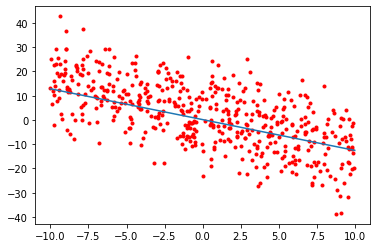

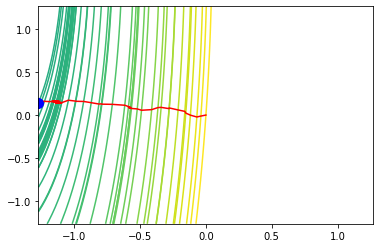

In [5]:
index = storage.add_benchmark_config(batch_size='mini10')
ab, meta = minibatch_gd(points, batch_size=10)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

## 50

[-1.40452782  0.46824819]
Benchmark results for config <('mini50', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.099547
Mean memory:0.0B
Mean SMAPE value:0.547079646312831
Mean RMSE value:10.288450371798698
Mean logcosh value:3817.093714637799
Mean gradient calls:5450.0
Iterations done:109.0


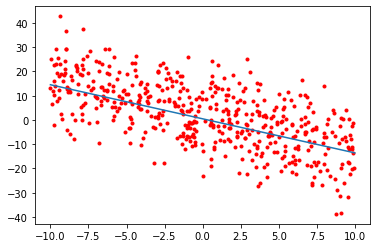

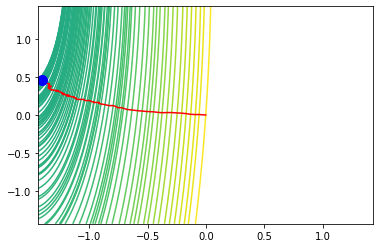

In [6]:
index = storage.add_benchmark_config(batch_size='mini50')
ab, meta = minibatch_gd(points, batch_size=50)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

## 100

[-1.28031084  0.14516447]
Benchmark results for config <('mini100', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.04361
Mean memory:0.0B
Mean SMAPE value:0.5584818964318342
Mean RMSE value:10.411951875300336
Mean logcosh value:3863.6267317212005
Mean gradient calls:5000.0
Iterations done:50.0


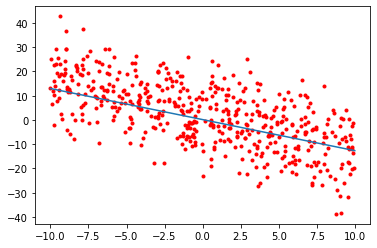

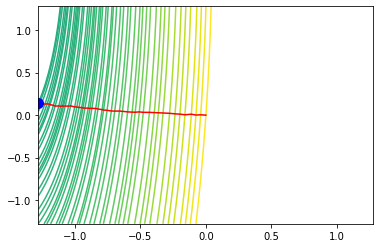

In [7]:
index = storage.add_benchmark_config(batch_size='mini100')
ab, meta = minibatch_gd(points, batch_size=100)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `k` вызовов градта за итерацию
* Точность лучше т.к. `k` градиентов из суммы лучше описывает градиент суммы
* Градиент м/у итерациями меньше "прыгает"/почти не "прыгает"

# GD

[-1.2376197   0.17620935]
Benchmark results for config <('gd', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.189775
Mean memory:0.0B
Mean SMAPE value:0.5634406107536155
Mean RMSE value:10.438749213827784
Mean logcosh value:3874.233627372033
Mean gradient calls:25000.0
Iterations done:50.0


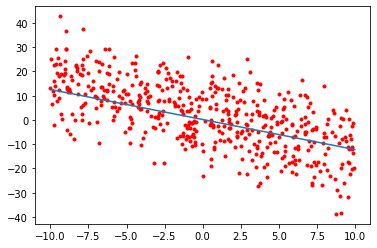

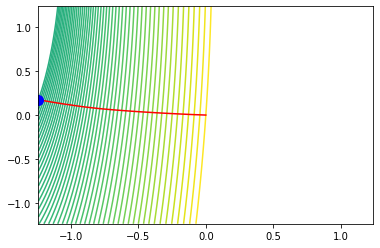

In [8]:
index = storage.add_benchmark_config(batch_size='gd')
ab, meta = gd(points)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

#### Наблюдения
* `n` вызовов градта за итерацию
* Точность лучше т.к. градиент всей функции
* Градиент м/у итерациями меньше "прыгает"/почти не "прыгает"

# Benchmark

In [20]:
batch_sizes = [1, 10, 25, 100, 250, 500]

result = np.array([])
for batch_size in tqdm(batch_sizes, "Batch sizes", position=2):
    index = storage.add_benchmark_config(batch_size=str(batch_size))
    for _ in range(20 if batch_size != len(points) else 1):
        ab, meta = minibatch_gd(points, batch_size=batch_size, eps=5e-2)
    storage.add_benchmark_result(index, meta)
    result = np.append(result, storage.get_benchmark_results_arrayed(index))

result

Batch sizes:   0%|          | 0/6 [00:00<?, ?it/s]

array([('1', 1, Default(no) optimization, Squared error calculator),
       0.006334, '0.0B', 0.4709652605513595, 10.506129461102953,
       7.654742537833588, 67.0, 67.0,
       ('10', 1, Default(no) optimization, Squared error calculator),
       0.015245, '0.0B', 0.4444630363190165, 10.164510750403206,
       7.41130045735412, 910.0, 91.0,
       ('25', 1, Default(no) optimization, Squared error calculator),
       0.037668, '0.0B', 0.4399643491035327, 10.07805392158825,
       7.347234035897143, 4050.0, 162.0,
       ('100', 1, Default(no) optimization, Squared error calculator),
       0.143947, '0.0B', 0.43392521000510453, 10.04783997271253,
       7.3377838979883325, 19900.0, 199.0,
       ('250', 1, Default(no) optimization, Squared error calculator),
       0.396566, '0.0B', 0.4368243668270017, 10.058296128771184,
       7.339602472004959, 45250.0, 181.0,
       ('500', 1, Default(no) optimization, Squared error calculator),
       0.950891, '0.0B', 0.43620698496493826, 10.054

In [21]:
result = result.reshape((-1, 8))
df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.1.csv", sep='\t')
df

,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(1, 1, Default(no) optimization, Squared error...",0.006334,0.0B,0.470965,10.506129,7.654743,67.0,67.0
1,"(10, 1, Default(no) optimization, Squared erro...",0.015245,0.0B,0.444463,10.164511,7.4113,910.0,91.0
2,"(25, 1, Default(no) optimization, Squared erro...",0.037668,0.0B,0.439964,10.078054,7.347234,4050.0,162.0
3,"(100, 1, Default(no) optimization, Squared err...",0.143947,0.0B,0.433925,10.04784,7.337784,19900.0,199.0
4,"(250, 1, Default(no) optimization, Squared err...",0.396566,0.0B,0.436824,10.058296,7.339602,45250.0,181.0
5,"(500, 1, Default(no) optimization, Squared err...",0.950891,0.0B,0.436207,10.054389,7.337909,93000.0,186.0
